In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [3]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/rob/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [4]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
from torchvision import transforms

In [7]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225])
])

In [8]:
from PIL import Image

In [9]:
img = Image.open("../data/golden.jpg")

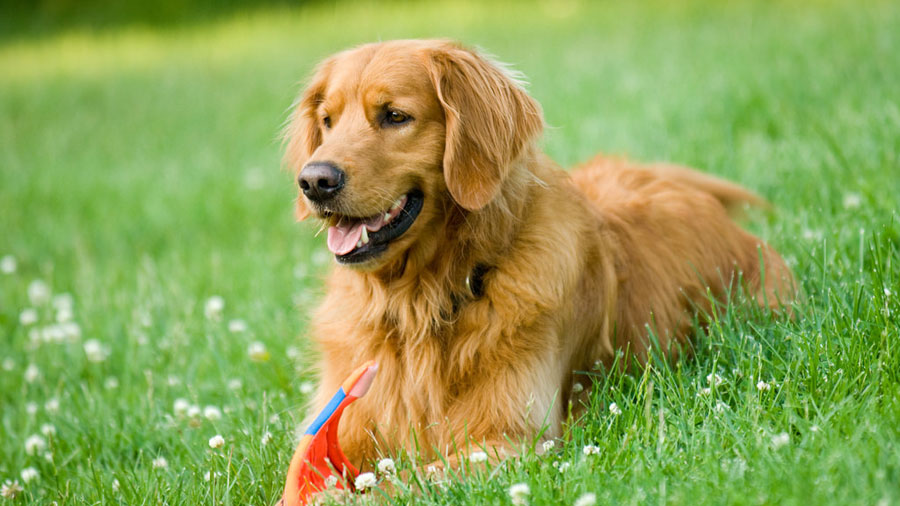

In [13]:
img

In [14]:
img_t = preprocess(img)

In [15]:
import torch

In [16]:
batch_t = torch.unsqueeze(img_t, 0)

In [17]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [18]:
out = resnet(batch_t)

In [19]:
out

tensor([[-7.7299e-01,  7.2717e-01, -2.0684e+00, -2.6556e+00, -2.8479e+00,
         -1.5806e+00, -2.4516e+00, -1.2975e+00,  3.8434e-01, -2.7577e+00,
         -7.5239e-01, -2.7985e-01, -6.7818e-01, -1.8868e+00,  4.1611e-01,
          5.5262e-01, -1.7274e+00,  4.7457e-01, -2.4638e-01, -1.0356e+00,
         -2.5110e+00, -1.6286e+00, -2.6289e+00, -4.6305e-01, -4.9790e-01,
         -1.1793e-03, -6.5800e-01,  8.2880e-01, -4.8411e-01, -1.0727e+00,
         -7.8376e-02, -1.2990e+00, -1.7928e-01, -2.7794e+00, -1.8945e+00,
         -1.5010e+00, -3.7038e-01, -9.1961e-01, -1.0880e+00, -4.2407e-01,
          4.2831e-01, -3.0193e-02,  1.0729e+00, -1.0350e+00, -1.2586e+00,
         -1.9821e+00,  1.5417e+00, -1.3023e+00, -1.6959e+00, -1.5796e+00,
         -2.0723e+00, -2.4551e+00,  8.7591e-01, -1.4285e-01, -1.1478e+00,
          1.4297e-01, -1.4035e+00, -7.7326e-01, -3.0501e-02,  2.7903e-01,
          1.2405e+00, -1.6984e+00, -3.3601e-01, -1.2010e+00, -7.0324e-01,
         -1.5115e+00, -7.5741e-01,  7.

In [20]:
with open('../data/imagenet_classes.txt') as f: 
    labels = [line.strip() for line in f.readlines()]

In [25]:
labels

['',
 '',
 '',
 '',
 '',
 '<!DOCTYPE html>',
 '<html lang="en">',
 '<head>',
 '<meta charset="utf-8">',
 '<link rel="dns-prefetch" href="https://github.githubassets.com">',
 '<link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">',
 '<link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">',
 '<link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">',
 '<link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">',
 '<link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">',
 '<link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">',
 '',
 '',
 '',
 '<link crossorigin="anonymous" media="all" integrity="sha512-YMmzFjPJlvm/Qhqug7ZE3UZYDXl4sfGs/xmLIlbN/cPFV/AU5/89DOLsHIwlpQFyji5oVuWE049paRcr+RF3cQ==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-60c9b31633c996f9bf421aae83b644dd.css" />',
 '<link crossorigin="anonymous" media="all" integrity="sha512-37pLQI8klDWPjWVVWFB9ITJ

In [21]:
_, index = torch.max(out, 1)

In [24]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 
labels[index[0]], percentage[index[0]].item()

('</summary>', 87.73622131347656)